## Python-For-DataScience

10.Write python program


a.To read from a CSV file of the given data using ‘pandas’ library.


b.For the given data, plot the scatter matrix for males only. Explain about 2
sub-populations’ correspondence to gender.


c.For the given data, using python environment, apply 1-sample t-test: testing the value
of population mean.


d.For the given data, using python environment, apply 2-sample t-test: testing for
difference across the population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('ML/DataFrames/brain_size.csv', sep=';', na_values=".")
print(data.shape)

(40, 8)


In [9]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [8]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['Height']:
    print((gender, value.mean()))

print(groupby_gender.mean())

('Female', 65.765)
('Male', 71.43157894736842)
        Unnamed: 0   FSIQ     VIQ     PIQ      Weight     Height  MRI_Count
Gender                                                                     
Female       19.65  111.9  109.45  110.45  137.200000  65.765000   862654.6
Male         21.35  115.0  115.25  111.60  166.444444  71.431579   954855.4


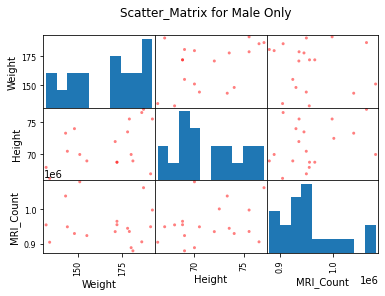

In [12]:
male_index=(data["Gender"]=='Male') # to retrive Male indices
male_data=data[male_index] # to separate male data
# scatter matrix for only Weight,height and MRI COunt
pd.plotting.scatter_matrix(male_data[['Weight', 'Height', 'MRI_Count']], color = 'r')
plt.suptitle("Scatter_Matrix for Male Only")
plt.show()

In [13]:
from scipy import stats
test_result=stats.ttest_1samp(data['VIQ'], 0)
print("1-Sample t-Test")
print(test_result)

1-Sample t-Test
Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)


In [14]:
female_viq=data[data['Gender']=='Female']['VIQ']
male_viq=data[data['Gender']=='Male']['VIQ']
test_result2=stats.ttest_ind(female_viq, male_viq)
print("2 Sample t-test")
print(test_result2)

2 Sample t-test
Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)
